In [1]:
%matplotlib inline

from numpy import *
from numpy.linalg import solve, norm    # Solve linear systems and compute norms
from matplotlib.pyplot import *
from math import factorial
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)


**Methods**   
These functions will do one step with a given method.

In [19]:
def euler(f, x, y, h):
    # One step of the Euler method
    y_next = y + h*f(x, y)
    x_next = x + h
    return x_next, y_next

def heun(f, x, y, h):
    # One step of Heun's method
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_next = y + 0.5*h*(k1+k2)
    x_next = x + h
    return x_next, y_next

**Driver for the ODE solvers (constant stepsize)**

In [3]:
def ode_solver(f, x0, xend, y0, h, method=euler):
    # Generic solver for ODEs
    #    y' = f(x,y), y(a)=y0
    # Input: f, the integration interval x0 and xend, 
    #        the stepsize h and the method of choice.  
    #   
    # Output: Arrays with the x- and the corresponding y-values. 
    
    # Initializing:
    y_num = array([y0])    # Array for the solution y 
    x_num = array([x0])    # Array for the x-values

    xn = x0                # Running values for x and y
    yn = y0 

    # Main loop
    while xn < xend - 1.e-10:            # Buffer for truncation errors        
        xn, yn = method(f, xn, yn, h)    # Do one step by the method of choice
        
        # Extend the arrays for x and y
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num,xn)
        
    return x_num, y_num

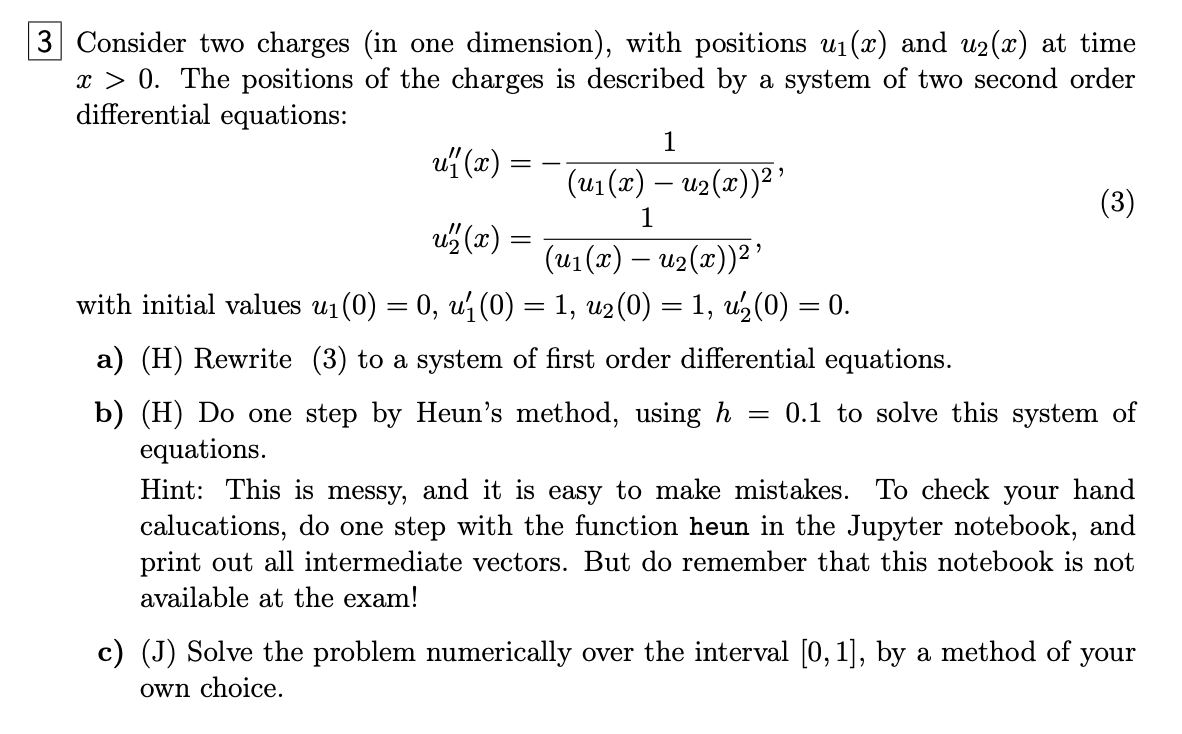

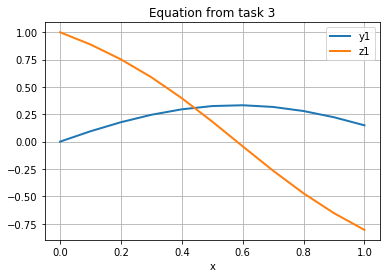

In [21]:
# Not sure about this task
def f(x,y):
    return array([y[2],
                 y[3],
                 -1/(y[0]-y[1])**2,
                 1/(y[0]-y[1])**2])

x0, xend = 0, 1
y0 = array([0,1,1,0])
h = 0.1

x_eu, y_eu = ode_solver(f, x0, xend, y0, h, method = euler)

# Plot the solution
plot(x_eu,y_eu);
xlabel('x')
title('Equation from task 3')
grid(True)
legend(['$u_1$','$u_2$','$u_1\'$','$u_2\'$'],loc=1);

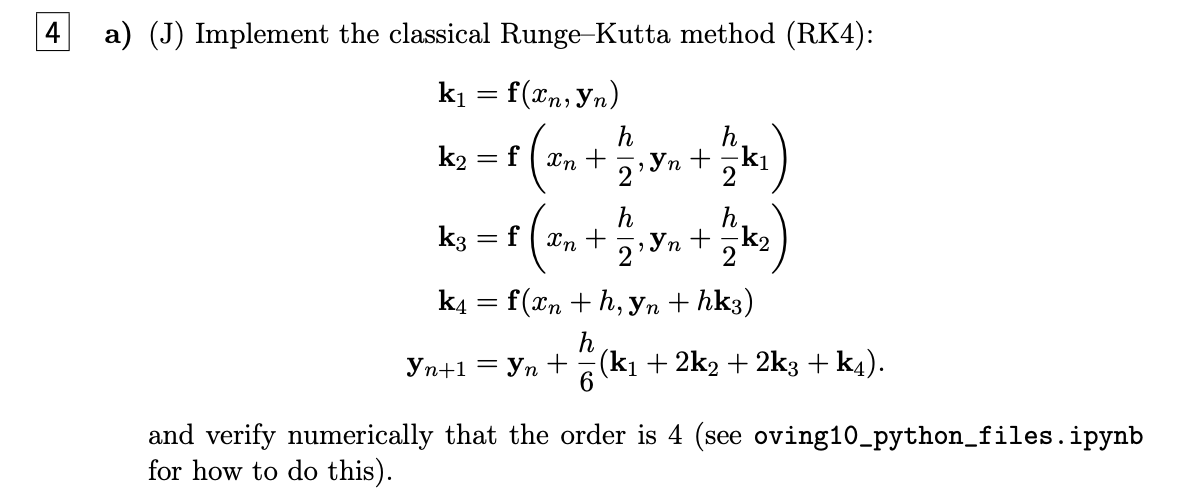

In [5]:
def RK4(f, x, y, h):
    # One step RK4 (Runge-Kutta method)
    k1 = f(x, y)
    k2 = f(x + (h/2), y + (h/2)*k1)
    k3 = f(x + (h/2), y + (h/2)*k2)
    k4 = f(x + h, y + h*k3)
    y_next = y + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    x_next = x + h
    return x_next, y_next

# Test the order of a method, given a test equation with exact solution
def f1(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h = 0.5
x0, xend= 0, 1
y0 = 1

print('h           error          order \n----------------------------------')
 
for n in range(10):
    x_num, y_num = ode_solver(f1, x0, xend, y0, h, method = RK4)    
    error = norm(y_eksakt(xend)-y_num[-1])       # Error in the end point
    if n is 0:                 
        order = NaN          # Nothing to compare              
    else:
        order = log2(error_old/error)     # Calculate  the order p
    print(format('{:.3e}   {:.3e}   {:7.2f}'.format( h, error, order))) 
    h = 0.5*h               # Reduce the stepsize
    error_old = error 

h           error          order 
----------------------------------
5.000e-01   1.524e-04       nan
2.500e-01   5.505e-05      1.47
1.250e-01   3.927e-06      3.81
6.250e-02   2.501e-07      3.97
3.125e-02   1.565e-08      4.00
1.562e-02   9.768e-10      4.00
7.812e-03   6.099e-11      4.00
3.906e-03   3.809e-12      4.00
1.953e-03   2.381e-13      4.00
9.766e-04   1.449e-14      4.04


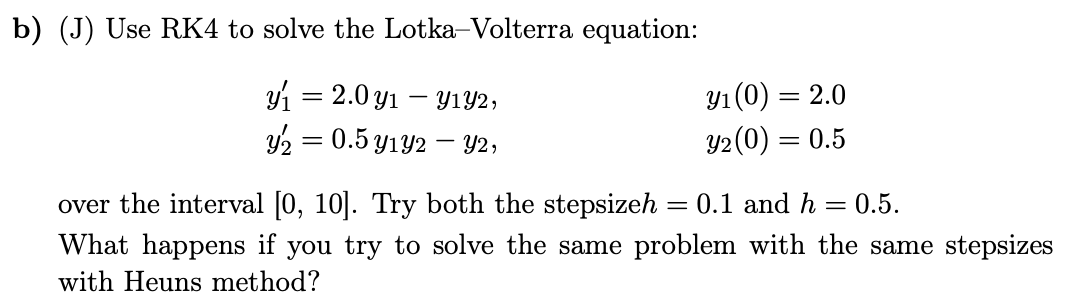

In [6]:
def lotka_volterra(x, y):
    # Lotka-Volterra equation
    # Initial values y(0) = [2.0, 0.5]
    alpha, beta, delta, gamma = 2, 1, 0.5, 1     # Parameters
    dy = array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy


f = lotka_volterra
x0, xend = 0, 10 
y0 = array([2, 0.5]) 
h1 = 0.1
h2 = 0.5


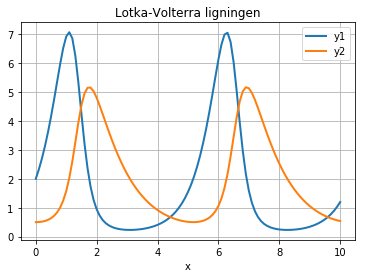

In [7]:
# With stepsize = 0.1 and RK4
x_lv, y_lv = ode_solver(f, x0, xend, y0, h1, method = RK4)
plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'],loc=1);

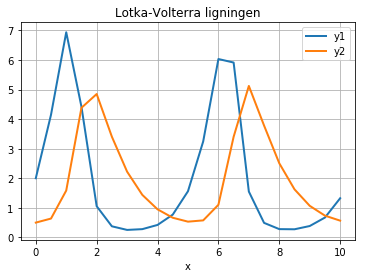

In [8]:
# With stepsize = 0.5 and RK4
x_lv, y_lv = ode_solver(f, x0, xend, y0, h2, method = RK4)
plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'],loc=1);

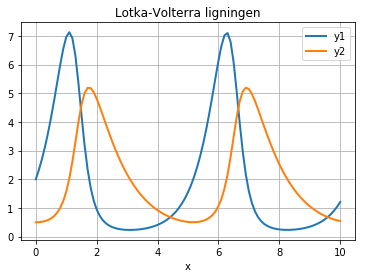

In [9]:
# With stepsize = 0.1 and Heun
x_lv, y_lv = ode_solver(f, x0, xend, y0, h1, method = heun)
plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'],loc=1);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in double_scalars
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


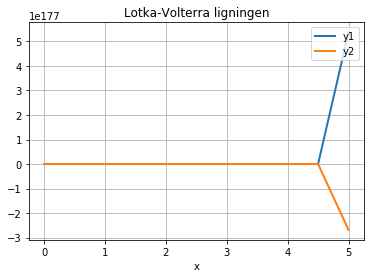

In [10]:
# With stepsize = 0.5 and Heun (Overflow will encounter)
x_lv, y_lv = ode_solver(f, x0, xend, y0, h2, method = heun)
plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'],loc=1);